In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [4]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

In [5]:
# Загрузим необходимые данные
series = pd.read_csv('monthly-car-sales-in-quebec-1960.csv')['Count']

Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


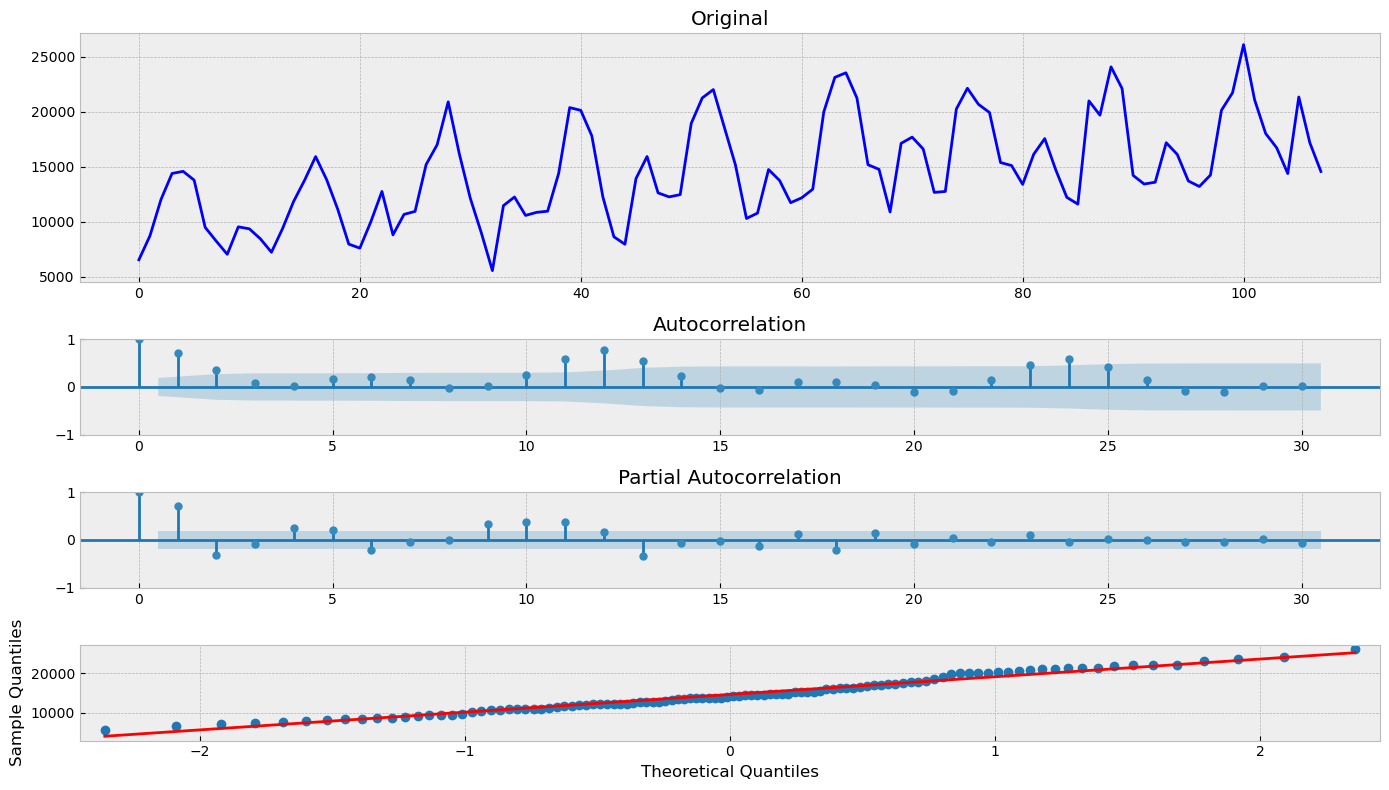

In [6]:
# Построим изначальный временной ряд
tsplot(series, lags=30)

In [15]:
# Найдём лучшие параметры для модели ARIMA
from pmdarima import auto_arima

best_param = auto_arima(series, trace=True, suppress_warnings=True)
best_param.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2006.439, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2042.237, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2041.299, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2041.105, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2040.297, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2003.066, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2016.379, Time=0.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2006.696, Time=0.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2007.889, Time=0.26 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2014.649, Time=0.11 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2001.135, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  108
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -994.567
Date:                Mon, 04 Mar 2024   AIC                           2001.135
Time:                        15:22:58   BIC                           2017.172
Sample:                             0   HQIC                          2007.636
                                - 108                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7167      0.148      4.826      0.000       0.426       1.008
ar.L2         -0.7288      0.148     -4.920      0.000      -1.019      -0.438
ar.L3         -0.2336      0.144     -1.623      0.104      -0.516       0.048
ma.L1         -0.7505      0.062    -12.055      0.000      -0.872      -0.628
ma.L2          0.9108      0.086     10.533      0.000       0.741       1.080
sigma2      8.572e+06   2.81e-09   3.05e+15      0.000    8.57e+06    8.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.43
Prob(Q):                              0.90   Prob(JB):                         0.81
Heteroskedasticity (H):               1.52   Skew:                             0.15
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.09e+31. Standard errors may be unstable.
"""

In [8]:
# Обучим модель арима для временного ряда с полученными параметрами
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series, order=(3,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                  108
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -994.567
Date:                Mon, 04 Mar 2024   AIC                           2001.135
Time:                        14:58:46   BIC                           2017.172
Sample:                             0   HQIC                          2007.636
                                - 108                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7167      0.148      4.826      0.000       0.426       1.008
ar.L2         -0.7288      0.148     -4.920      0.000      -1.019      -0.438
ar.L3         -0.2336      0.144     -1.623      0.1

In [9]:
# Получим предсказания модели
preds = model_fit.predict(start=len(series), end=len(series)+10)

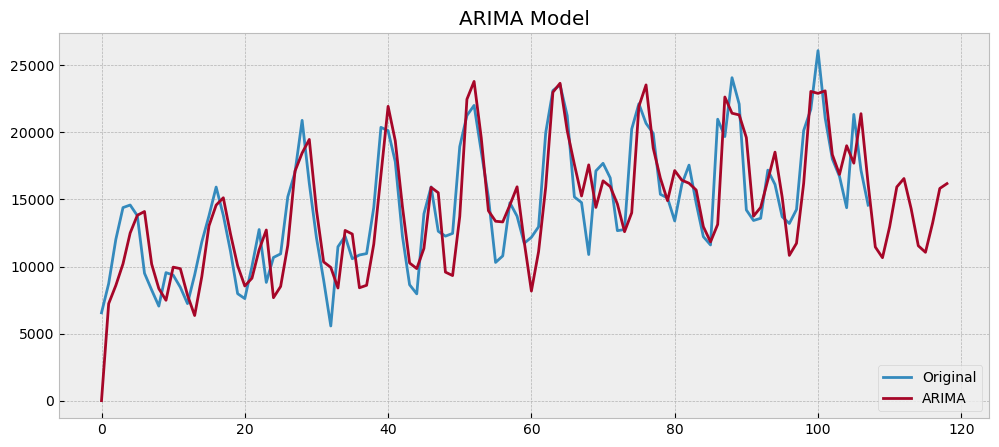

In [10]:
# Визуализируем прогноз ARIMA
plt.style.use('bmh')
plt.figure(figsize=(12, 5))
plt.plot(series, label='Original')
# plt.plot(model_fit.fittedvalues,  label='ARIMA')
# plt.plot(preds, color='green', label='ARIMA Predict')

plt.plot(np.concatenate([model_fit.fittedvalues, preds]), label='ARIMA')

plt.title('ARIMA Model')
plt.legend(loc='lower right')
plt.show()